# Project: Wrangling and Analyze Data

## Importing Required Libraries

In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import requests
import os
import json
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import io
from timeit import default_timer as timer






## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive=pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Make directory if it doesn't already exist
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#Download the image prediction tsv from the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# save html to file 
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)
    
#write the image predictions tsv file to a data frame
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t') 


In [6]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:

if os.path.isfile('tweet_json.txt'):
    print("The dataset has been downloaded already and written into the tweet_json.txt file. The data will be extracted from this file below")
else:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

    consumer_key = ''
    consumer_secret = ''
    access_token = ''
    access_secret = ''

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

    tweet_ids = twitter_archive.tweet_id.values
    len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

The dataset has been downloaded already and written into the tweet_json.txt file. The data will be extracted from this file below


In [8]:
with open('tweet.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue


In [9]:
tweet_list=[]


## To read the .txt file into a list of dictionaries
for line in open('tweet.txt', 'r'):
    tweet_data = json.loads(line)
    tweet_list.append({'id': tweet_data['id_str'],
                        'retweet_count': tweet_data['retweet_count'],
                        'favorite_count': tweet_data['favorite_count'],
                        'followers_count': tweet_data['user']['followers_count']})

In [10]:
# Convert the list of dictionaries to a pandas DataFrame
tweet_data = pd.DataFrame(tweet_list, columns = ['id', 'retweet_count', 'favorite_count', 'followers_count'])

In [11]:
# to check brief details about the data
tweet_data

,id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


## Assessing Data



#### Twitter Archive Dataset

In [12]:
# Visual assessment of the twitter archive dataset
twitter_archive.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1211,715360349751484417,NaN,NaN,2016-03-31 02:09:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bertson. He just wants to say hi. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715360349...,11,10,Bertson,None,None,None,None
107,871762521631449091,NaN,NaN,2017-06-05 16:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rover. As part of pupper protocol he h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871762521...,12,10,Rover,None,None,pupper,None
456,818259473185828864,NaN,NaN,2017-01-09 00:53:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Florence. He saw the same snap you sen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818259473...,12,10,Florence,None,None,None,None
1075,739623569819336705,NaN,NaN,2016-06-06 01:02:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo that don't need no human. 12/10...,NaN,NaN,NaN,https://vine.co/v/iY9Fr1I31U6,12,10,None,doggo,None,None,None
2230,668237644992782336,NaN,NaN,2015-11-22 01:20:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Torque. He served his nickel. Better n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668237644...,10,10,Torque,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,771500966810099713,NaN,NaN,2016-09-02 00:12:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dakota. He's just saying hi. That's al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771500966...,12,10,Dakota,None,None,None,None
2172,669327207240699904,NaN,NaN,2015-11-25 01:30:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just got home from college. Dis my dog. She do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669327207...,13,10,None,None,None,None,None
1405,699323444782047232,NaN,NaN,2016-02-15 20:04:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""I'm bathing the children what do you want?"" ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/699323444...,10,10,None,None,None,None,None
1819,676590572941893632,6.765883e+17,4.196984e+09,2015-12-15 02:32:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After some outrage from the crowd. Bubbles is ...,NaN,NaN,NaN,NaN,7,10,None,None,None,None,None


In [13]:
# To check the twitter_archive dataset's information and its data types
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
# To check for the description of the data
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# To check if the dataset has null values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
# To check for duplicate values
twitter_archive.duplicated().sum()

0

#### Image Prediction Dataset

In [17]:
# Visually assess the data 
image_prediction.sample(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1472,779834332596887552,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,1,golden_retriever,0.993830,True,cocker_spaniel,0.003143,True,Great_Pyrenees,0.000917,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
2018,880221127280381952,https://pbs.twimg.com/media/DDcscbXU0AIfDzs.jpg,1,Chihuahua,0.238525,True,meerkat,0.104256,False,clumber,0.052580,True
583,678800283649069056,https://pbs.twimg.com/media/CWuVQSLW4AAI3w9.jpg,1,Labrador_retriever,0.213673,True,beagle,0.146235,True,Airedale,0.122701,True
1689,815639385530101762,https://pbs.twimg.com/media/C1G7sXyWIAA10eH.jpg,1,German_shepherd,0.817953,True,Norwegian_elkhound,0.140007,True,malinois,0.024821,True
...,...,...,...,...,...,...,...,...,...,...,...,...
767,689275259254616065,https://pbs.twimg.com/media/CZDMMY0WEAAQYjQ.jpg,1,American_Staffordshire_terrier,0.215161,True,Chesapeake_Bay_retriever,0.079051,True,Doberman,0.070226,True
997,708356463048204288,https://pbs.twimg.com/media/CdSWcc1XIAAXc6H.jpg,2,pug,0.871283,True,French_bulldog,0.041820,True,bath_towel,0.015228,False
1717,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
699,684594889858887680,https://pbs.twimg.com/media/CYAra7JWsAACPZH.jpg,1,Weimaraner,0.948688,True,English_setter,0.035352,True,Brittany_spaniel,0.003879,True


In [18]:
## To check the image prediction's dataset's information and its data types
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# To check for the description of the dataset
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
# To check if the dateset has null values
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [21]:
# To check for duplicate values
image_prediction.duplicated().sum()

0

#### Twitter Api Dataset

In [22]:
# visually assess a sample of the data
tweet_data.sample(100)

,id,retweet_count,favorite_count,followers_count
1194,717047459982213120,2135,6826,3200945
1781,677673981332312066,1677,3603,3200954
366,828770345708580865,6746,28085,3200892
2307,666804364988780544,95,250,3201018
1871,675145476954566656,1011,2305,3201003
...,...,...,...,...
1286,708349470027751425,831,2568,3200947
1599,686003207160610816,735,2009,3200950
1277,708845821941387268,1015,3226,3200947
133,866686824827068416,3727,20070,3200891


In [23]:
# To check the datasets information and its data types
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [24]:
#To check for the description of the dataset
tweet_data.describe()

,retweet_count,favorite_count,followers_count
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,3.200942e+06
std,5284.770364,11814.771334,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,624.500000,1415.000000,3.200898e+06
50%,1473.500000,3603.500000,3.200945e+06
75%,3652.000000,10122.250000,3.200953e+06
max,79515.000000,132810.000000,3.201018e+06


In [25]:
# To check for null values
tweet_data.isnull().sum()

id                 0
retweet_count      0
favorite_count     0
followers_count    0
dtype: int64

In [26]:
# To check for duplicate values
tweet_data.duplicated().sum()

0

### Quality issues

1. It was observed that the source column is in HTML- formatted string

2. The columns for dog ratings which has numerator and numerator needs to be worked on.

3. Removal of records that are not needed such as retweets leaving only original tweets. 

4. Missing values are observed in some columns namely retweeted_status_id, retweeted_status_timestamp, in_reply_to_user_id, 

5. There are lots of missing names from the list under 'None' and random names like 'a' and 'an' would likely be parts of string that got taken out of context.

6. Observation of invalid dataypes for columns timestamp and tweet_id

7. To ensure uniformity across the data sources the column id in the tweet api table should be changed to tweet_id.

8.  Some tweets had "\&amp" combined with ";" which is the html code to display just the ampersand

### Tidiness issues
1. pupper, puppo, floofer and doggo columns should be combined to form on column named "dog_stage"

2. The three tables should be merged to form one table

## Cleaning Data
In this section,I would clean **all** of the issues i documented while assessing. 


In [27]:
# Make copies of original pieces of data
twitter_arch_clean=twitter_archive.copy()
img_pred_clean=image_prediction.copy()
tweet_clean=tweet_data.copy()

### Issue #1: REMOVAL OF HTML FORMATTED STRING

#### Define:It was observed that the source column is in HTML- formatted string

#### Code

In [28]:
#We want to change this list: 
source_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
#to this list:
new_source_list = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']

In [29]:
[twitter_arch_clean.source.replace(source_list, new_source_list, inplace=True) for current_source, new_source in zip(source_list, new_source_list)];

#### Test

In [30]:
#To confirm that the html codes have been removed
twitter_arch_clean.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

### Issue #2: Correction of the Ratings Column


#### Define
The dog ratings column needs to be corrected
1. Removal of denominators with zero value
2. Conversion of the data type of the numerators to float
3. Creation of a normal rating 

#### Code

In [31]:
 # This is to confirm if some columns were properly extracted as decimals
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\USER\AppData\Local\Temp\ipykernel_436\3992020719.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [32]:
# We can see that a couple of columns were not extracted properly

In [33]:

#Replace rating_numerator integer values with the right float values
rating = twitter_arch_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
twitter_arch_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
twitter_arch_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

#### Test

In [34]:
# To confirm if the modifications took effect
twitter_arch_clean[twitter_arch_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\USER\AppData\Local\Temp\ipykernel_436\2719433009.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_arch_clean[twitter_arch_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
340,"RT @dog_rates: This is Logan, the Chow who liv...",9.75
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1689,I've been told there's a slight possibility he...,9.50
1712,Here we have uncovered an entire battalion of ...,11.26


### Issue #3: Removal of unneeded records leaving only the original tweets


#### Define: 
Retweets and replies should be deleted from the archive table.


#### Code:

In [35]:
#Removal of  replies from the archive table
twitter_arch_clean = twitter_arch_clean[pd.isnull(twitter_arch_clean['in_reply_to_user_id'])]
    
#Removal of retweets from the archive table
twitter_arch_clean = twitter_arch_clean[pd.isnull(twitter_arch_clean['retweeted_status_user_id'])]



#### Test:
We can test if it has been removed by checking the information of the dataset

In [36]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   float64
 11  rating_denominator          2097 non-null   float64
 12  name                        2097 non-null   object 
 13  doggo                       2097 

We can see from the table information that retweeted status and reply to status id columns have zero values.

### Issue #4:    Missing values are observed in some columns namely retweeted_status_timestamp, retweeted_status_user_id, in_reply_to_status_id,retweeted_status_id,in_reply_to_user_id



#### Define: 
1.Unneccessary columns should be deleted as they are not needed in the analysis

#### Code:

In [37]:
#Delete the columns not needed for the analysis
twitter_arch_clean.drop(['retweeted_status_timestamp', 'retweeted_status_user_id', 'in_reply_to_status_id','retweeted_status_id','in_reply_to_user_id'],  axis=1, inplace=True)

#### Test:

In [38]:
# Check the information of the dataset to confirm the columns have been deleted.
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   float64
 6   rating_denominator  2097 non-null   float64
 7   name                2097 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 213.0+ KB


The columns have been removed and we can proceed with our cleaning 

### Issue #5:  

#### Define: Cleanup of the dog_name column
1.There are lots of missing names from the list under 'None' and random names like 'a' and 'an' would likely be parts of string that got taken out of context.

#### Code:

In [39]:
Error = twitter_arch_clean.loc[(twitter_arch_clean.name.str.islower())].name.value_counts().index.tolist()
Error.append('None')
Error

['a',
 'the',
 'an',
 'one',
 'very',
 'quite',
 'just',
 'getting',
 'not',
 'actually',
 'old',
 'light',
 'life',
 'officially',
 'by',
 'infuriating',
 'such',
 'all',
 'unacceptable',
 'this',
 'mad',
 'his',
 'my',
 'incredibly',
 'space',
 'None']

In [40]:
for name in Error:
    twitter_arch_clean.loc[twitter_arch_clean.name == name, 'name'] = None

#### Test:

In [41]:
twitter_arch_clean.name.value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
              ..
Shelby         1
Sephie         1
Bonaparte      1
Wishes         1
Christoper     1
Name: name, Length: 929, dtype: int64

### Issue #6:


#### Define:  Observation of invalid dataypes for columns timestamp and tweet_id 




In [42]:
# To check the current datatype of the time stamp and tweet_id columns
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   float64
 6   rating_denominator  2097 non-null   float64
 7   name                1390 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 213.0+ KB


The datatype for the time stamp on twitter archive table should be date time while the data type for tweet_id should be object and the latter should be replicated across the other data sources.

#### Code:

In [43]:
# To convert the datatypes
twitter_arch_clean['tweet_id']=twitter_arch_clean['tweet_id'].astype('str')
twitter_arch_clean['timestamp']=pd.to_datetime(twitter_arch_clean['timestamp'])
img_pred_clean['tweet_id']=img_pred_clean['tweet_id'].astype('str')
tweet_clean['id']=tweet_clean['id'].astype('str')


#### Test:

In [44]:
# To check if the datatypes has changed
twitter_arch_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                1390 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

In [45]:
#Image Prediction
img_pred_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [46]:
# Twitter data
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


### Issue #7:


#### Define: Changing of Column name
1. To ensure uniformity across the data sources the column id in the tweet api table should be changed to tweet_id.


#### Code: 

In [47]:
tweet_clean.rename(columns = {'id':'tweet_id'}, inplace = True) 


#### Test

In [48]:
# Check the information of the tweet data table
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


### Issue #8:

#### Define: Removal of HTML codes 

Removal of "\&amp" combined with ";" which is the html code to display just the ampersand from some tweets

#### Code:

In [49]:
twitter_arch_clean['text'] = twitter_arch_clean.text.str.replace(r"http\S+", "")
twitter_arch_clean['text']=twitter_arch_clean.text.str.replace("&amp;", "&")
twitter_arch_clean['text'] = twitter_arch_clean.text.str.strip()
twitter_arch_clean['text'] = twitter_arch_clean.text.str.replace("\n", " ")

C:\Users\USER\AppData\Local\Temp\ipykernel_436\3984690248.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_arch_clean['text'] = twitter_arch_clean.text.str.replace(r"http\S+", "")


#### Test:

In [50]:
# To test if the values have been replaced
# substring to be searched
sub ='&amp'
 
# creating and passing series to new column
twitter_arch_clean["Indexes"]= twitter_arch_clean["text"].str.find(sub)
 
# display
twitter_arch_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Indexes
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,-1
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,-1
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,-1
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,-1
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,None,None,None,None,-1
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,None,None,None,None,None,-1
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,None,None,None,None,None,-1
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,None,None,None,None,None,-1


### Issue #9

#### Define:
1. pupper, puppo, floofer and doggo columns should be combined to form on column named "dog_stage"

#### Code:

In [51]:
twitter_arch_clean['combine_all'] = twitter_arch_clean.doggo + twitter_arch_clean.floofer + twitter_arch_clean.pupper + twitter_arch_clean.puppo

In [52]:
twitter_arch_clean.combine_all.value_counts()

NoneNoneNoneNone        1761
NoneNonepupperNone       221
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
NoneflooferNoneNone        9
doggoNonepupperNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: combine_all, dtype: int64

In [53]:
# A function should be created to check the stages of the dogs
# create function to check dog stages
def stage_check(archive):
    if archive['combine_all'].count('None') == 2:
        return 'Multiple' #this means it has more than one dog stage
    else:
        if archive['combine_all'].count('doggo') == 1:
            return 'Doggo'
        elif archive['combine_all'].count('floofer') == 1:
            return 'Floofer'
        elif archive['combine_all'].count('pupper') == 1:
            return 'Pupper'
        elif archive['combine_all'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

In [54]:
# The function should be applied to the table and a new table created
twitter_arch_clean['dog_stage'] = twitter_arch_clean.apply(stage_check, axis=1)

In [55]:
# The dog stage data type should be converted to category
twitter_arch_clean['dog_stage'] =twitter_arch_clean['dog_stage'].astype('category')

In [56]:
# The doggo,pupper, puppo, and floofer columns should be dropped.
twitter_arch_clean.drop(['doggo','floofer','puppo','pupper','combine_all'], axis = 1 , inplace = True)

#### Test:

In [57]:
# Check the table information of the twitter archive dataset
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                1390 non-null   object             
 8   Indexes             2097 non-null   int64              
 9   dog_stage           2097 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 166.1+ KB


### Issue #10

#### Define: The three tables should be merged to form one table

#### Code:

In [58]:
# To merge the tables
twitter_arch_clean_mg= twitter_arch_clean.merge(img_pred_clean, how='left', on='tweet_id')


In [59]:
twitter_arch_clean_comb= twitter_arch_clean_mg.merge(tweet_clean, how='left', on='tweet_id')

In [60]:
# To remove missing records
twitter_arch_clean_comb.dropna(axis=0, inplace =True)

#### Test

In [61]:
# Check the table information 
twitter_arch_clean_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 2066
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1349 non-null   object             
 1   timestamp           1349 non-null   datetime64[ns, UTC]
 2   source              1349 non-null   object             
 3   text                1349 non-null   object             
 4   expanded_urls       1349 non-null   object             
 5   rating_numerator    1349 non-null   float64            
 6   rating_denominator  1349 non-null   float64            
 7   name                1349 non-null   object             
 8   Indexes             1349 non-null   int64              
 9   dog_stage           1349 non-null   category           
 10  jpg_url             1349 non-null   object             
 11  img_num             1349 non-null   float64            
 12  p1                  1349 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [62]:
twitter_arch_clean_comb.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data


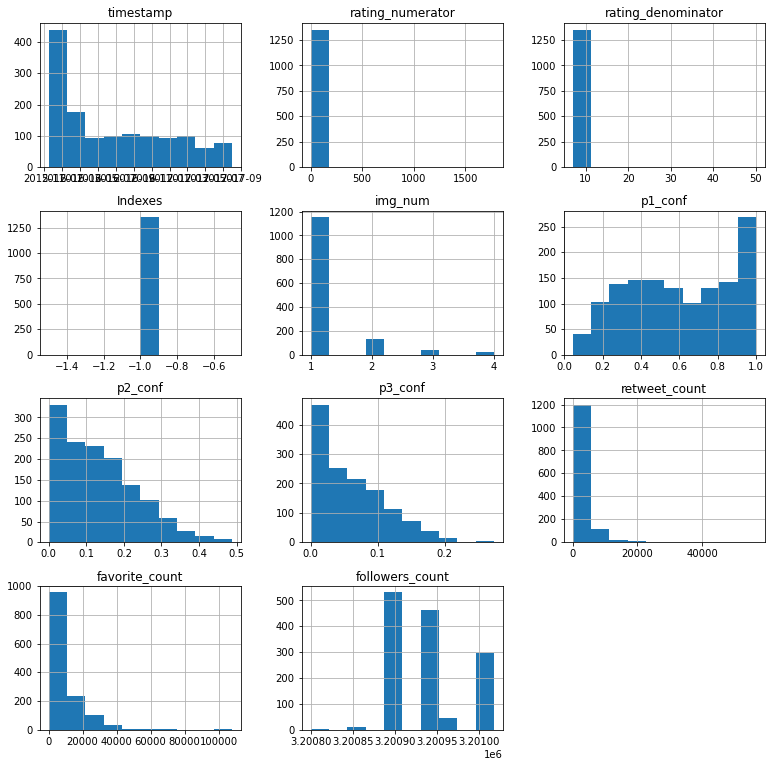

In [63]:
# Lets view the data once again so we can make a proper analysis
twitter_arch_clean_comb.hist(figsize = (13,13));

In [64]:
twitter_arch_clean_comb.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Indexes,dog_stage,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,-1,None,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,3200889
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,-1,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,3200889
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,-1,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,3200889
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,-1,None,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,3200889
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,-1,None,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,3200889


### Insights:
1.Insights:


1.What is the most  and the least popular dog name?

2.What is the most commonly used Twitter Source

3.What is the rate of Weratedogs retweets over time?

4.What is the correlation between retweet and favourite counts

5.What is the most popular dog type?




### Question 1: What is the most popular dog name

In [65]:
# To check the most popular name of dog would be to know the name that appeared the most number of times
Top_5_names=twitter_arch_clean_comb.name.value_counts()[0:5]
Least_5_names=twitter_arch_clean_comb.name.value_counts()[-5:]

In [66]:
Top_5_names

Charlie    11
Lucy       10
Cooper     10
Oliver     10
Tucker      9
Name: name, dtype: int64

In [67]:
Least_5_names

Leela         1
Glenn         1
Shelby        1
Sephie        1
Christoper    1
Name: name, dtype: int64

Text(0.5, 0, 'Name of dog')

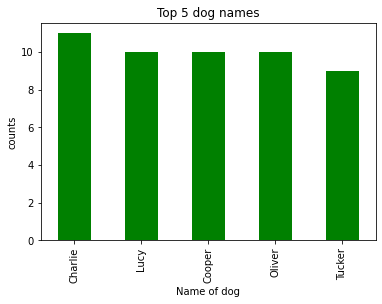

In [68]:
# To visualize them both 
Top_5_names.plot.bar(color='green');

# Top 5 dog names
plt.title('Top 5 dog names')
plt.ylabel('counts')
plt.xlabel('Name of dog')

##### Charlie and lucy tops the list of the top 5 dog names with 11 occurrences

Text(0.5, 0, 'Name of dog')

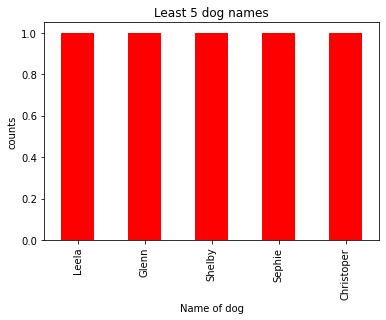

In [69]:
Least_5_names.plot.bar(color='Red');

# Top 5 dog names
plt.title('Least 5 dog names')
plt.ylabel('counts')
plt.xlabel('Name of dog')

#####           All five dog names namely Shelby Sephie, Bonaparte , Wishes and Christopher have just one occurence.

### Question 2 What is the most commonly used Twitter source

In [70]:
# Lets do a quick check
common_twitter_source=twitter_arch_clean_comb.source.value_counts()

Text(0.5, 0, 'Name of Twitter Source')

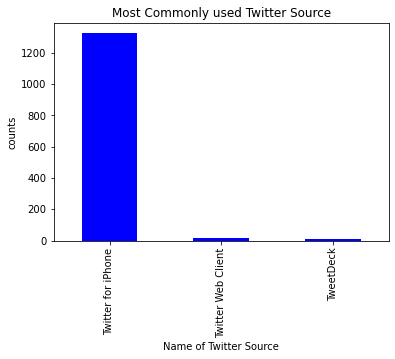

In [71]:
# To visualize this information 

common_twitter_source.plot.bar(color='blue');

# Top 5 dog names
plt.title('Most Commonly used Twitter Source')
plt.ylabel('counts')
plt.xlabel('Name of Twitter Source')

##### Twitter for Iphone is clearly the most common twitter source

### Question 3:.What is the rate of  Weratedogs retweets over time?

#### This would help gauge the popularity over a period of time

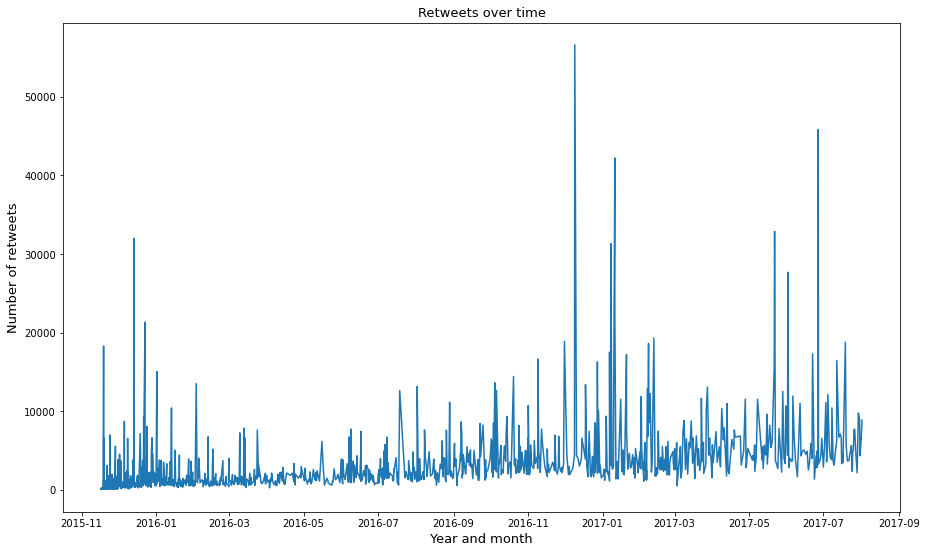

In [72]:
#plot
sns.set_context()
plt.subplots(figsize=(15, 9))
plt.plot(twitter_arch_clean_comb.timestamp, twitter_arch_clean_comb.retweet_count)
plt.title('Retweets over time', color = 'black', fontsize = '13')
plt.xlabel('Year and month', color = 'black', fontsize = '13')
plt.ylabel('Number of retweets', color = 'black', fontsize = '13');

##### We can see from the charts that the highest rate of rate was towards the end of 2016 while the lowest retweets came in May 2016.

### Question 4. What is the correlation between retweet and favourite counts

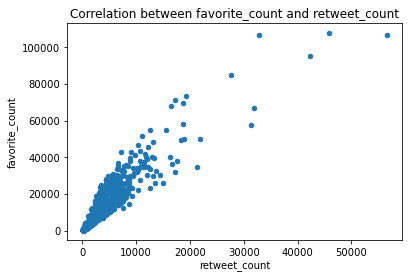

In [73]:

twitter_arch_clean_comb.plot.scatter(x='retweet_count', y='favorite_count');
plt.title('Correlation between favorite_count and retweet_count');


#### There is a positive correlation between the favorite count and retweet count which implies that the more a dog is liked the more the tweet is likely to be retweeted